In [1]:
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sb

%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [40]:
ads = pd.read_csv("../download/promoted_content.csv")
ads.head()

,ad_id,document_id,campaign_id,advertiser_id
0,1,6614,1,7
1,2,471467,2,7
2,3,7692,3,7
3,4,471471,2,7
4,5,471472,2,7


In [3]:
ads.count()

ad_id            559583
document_id      559583
campaign_id      559583
advertiser_id    559583
dtype: int64

In [4]:
print ads.ad_id.nunique(), ads.document_id.nunique(), ads.campaign_id.nunique(), ads.advertiser_id.nunique()

559583 185709 34675 4385


In [27]:
pd.DataFrame({'docsPerAd' : ads.groupby(['ad_id'])['document_id'].nunique()}).reset_index()['docsPerAd'].describe()

count    559583.0
mean          1.0
std           0.0
min           1.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
Name: docsPerAd, dtype: float64

In [28]:
pd.DataFrame({'campaignsPerAd' : ads.groupby(['ad_id'])['campaign_id'].nunique()}).reset_index()['campaignsPerAd'].describe()

count    559583.0
mean          1.0
std           0.0
min           1.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
Name: campaignsPerAd, dtype: float64

In [29]:
pd.DataFrame({'advertisersPerAd' : ads.groupby(['ad_id'])['advertiser_id'].nunique()}).reset_index()['advertisersPerAd'].describe()

count    559583.0
mean          1.0
std           0.0
min           1.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
Name: advertisersPerAd, dtype: float64

In [30]:
pd.DataFrame({'advertisersPerCampaign' : ads.groupby(['campaign_id'])['advertiser_id'].nunique()}).reset_index()['advertisersPerCampaign'].describe()

count    34675.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: advertisersPerCampaign, dtype: float64

In [5]:
adsPerDoc = pd.DataFrame({'adsPerDoc' : ads.groupby(['document_id'])['ad_id'].nunique()}).reset_index()
adsPerDoc['adsPerDoc'].describe()  #most docs has a single ad pointing to

count    185709.000000
mean          3.013225
std          44.176083
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max        8662.000000
Name: adsPerDoc, dtype: float64

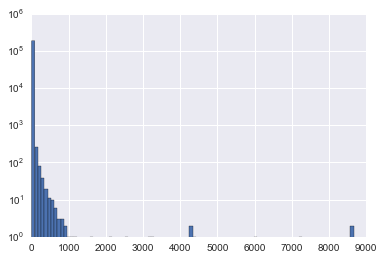

In [6]:
adsPerDoc['adsPerDoc'].hist(bins=100, log=True)

In [8]:
campaignsPerDoc = pd.DataFrame({'campaignsPerDoc' : ads.groupby(['document_id'])['campaign_id'].nunique()}).reset_index()
campaignsPerDoc['campaignsPerDoc'].describe()

count    185709.000000
mean          1.280703
std           1.586195
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max         298.000000
Name: campaignsPerDoc, dtype: float64

In [10]:
advertisersPerDoc = pd.DataFrame({'advertisersPerDoc' : ads.groupby(['document_id'])['advertiser_id'].nunique()}).reset_index()
advertisersPerDoc['advertisersPerDoc'].describe()

count    185709.000000
mean          1.012595
std           0.122429
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           5.000000
Name: advertisersPerDoc, dtype: float64

In [14]:
adsPerCampaign = pd.DataFrame({'adsPerCampaign' : ads.groupby(['campaign_id'])['ad_id'].nunique()}).reset_index()
adsPerCampaign['adsPerCampaign'].describe()

count    34675.000000
mean        16.137938
std         70.475540
min          1.000000
25%          2.000000
50%          5.000000
75%         12.000000
max       3806.000000
Name: adsPerCampaign, dtype: float64

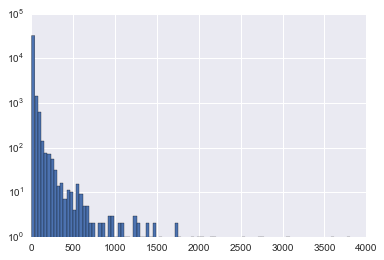

In [15]:
adsPerCampaign['adsPerCampaign'].hist(bins=100, log=True)

In [31]:
adsPerDocCampaign = pd.DataFrame({'adsPerDocCampaign' : ads.groupby(['document_id', 'campaign_id'])['ad_id'].nunique()}).reset_index()
adsPerDocCampaign['adsPerDocCampaign'].describe()

count    237838.000000
mean          2.352791
std           8.351826
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max        1129.000000
Name: adsPerDocCampaign, dtype: float64

In [16]:
docsPerCampaign = pd.DataFrame({'docsPerCampaign' : ads.groupby(['campaign_id'])['document_id'].nunique()}).reset_index()
docsPerCampaign['docsPerCampaign'].describe()

count    34675.000000
mean         6.859063
std         63.508021
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max       3806.000000
Name: docsPerCampaign, dtype: float64

In [18]:
adsPerAdvertiser = pd.DataFrame({'adsPerAdvertiser' : ads.groupby(['advertiser_id'])['ad_id'].nunique()}).reset_index()
adsPerAdvertiser['adsPerAdvertiser'].describe()

count     4385.000000
mean       127.612999
std        683.890064
min          1.000000
25%          2.000000
50%          8.000000
75%         36.000000
max      16529.000000
Name: adsPerAdvertiser, dtype: float64

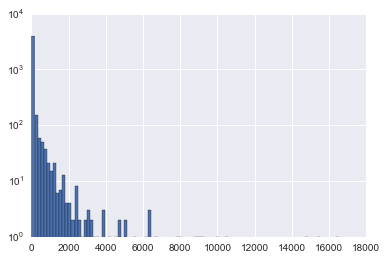

In [19]:
adsPerAdvertiser['adsPerAdvertiser'].hist(bins=100, log=True)

In [20]:
docsPerAdvertiser = pd.DataFrame({'docsPerAdvertiser' : ads.groupby(['advertiser_id'])['document_id'].nunique()}).reset_index()
docsPerAdvertiser['docsPerAdvertiser'].describe()

count     4385.000000
mean        42.884379
std        298.602406
min          1.000000
25%          1.000000
50%          3.000000
75%         10.000000
max      11637.000000
Name: docsPerAdvertiser, dtype: float64

In [22]:
campaignsPerAdvertiser = pd.DataFrame({'campaignsPerAdvertiser' : ads.groupby(['advertiser_id'])['campaign_id'].nunique()}).reset_index()
campaignsPerAdvertiser['campaignsPerAdvertiser'].describe()

count    4385.000000
mean        7.907640
std        29.325117
min         1.000000
25%         1.000000
50%         1.000000
75%         4.000000
max       448.000000
Name: campaignsPerAdvertiser, dtype: float64

In [41]:
ads = ads.merge(adsPerDoc, how = 'inner', on = ['document_id'])
#ads = ads.merge(campaignsPerDoc, how = 'inner', on = ['document_id'])
#ads = ads.merge(advertisersPerDoc, how = 'inner', on = ['document_id'])
ads = ads.merge(adsPerCampaign, how = 'inner', on = ['campaign_id'])
#ads = ads.merge(docsPerCampaign, how = 'inner', on = ['campaign_id'])
ads = ads.merge(adsPerAdvertiser, how = 'inner', on = ['advertiser_id'])
#ads = ads.merge(docsPerAdvertiser, how = 'inner', on = ['advertiser_id'])
#ads = ads.merge(campaignsPerAdvertiser, how = 'inner', on = ['advertiser_id'])

ads.head()

,ad_id,document_id,campaign_id,advertiser_id,adsPerDoc,adsPerCampaign,adsPerAdvertiser
0,1,6614,1,7,1,31,95
1,6,12736,1,7,1,31,95
2,7,12808,1,7,1,31,95
3,9,13379,1,7,1,31,95
4,10,13885,1,7,1,31,95


In [42]:
ads = ads.drop(['campaign_id', 'advertiser_id'], axis=1)
ads.columns = ['ad_id', 'document_id', 'doc_rate', 'campaign_rate', 'advertiser_rate']
ads.head()

,ad_id,document_id,doc_rate,campaign_rate,advertiser_rate
0,1,6614,1,31,95
1,6,12736,1,31,95
2,7,12808,1,31,95
3,9,13379,1,31,95
4,10,13885,1,31,95


In [43]:
ads.to_csv("../generated/promoted_content.csv", index=False)

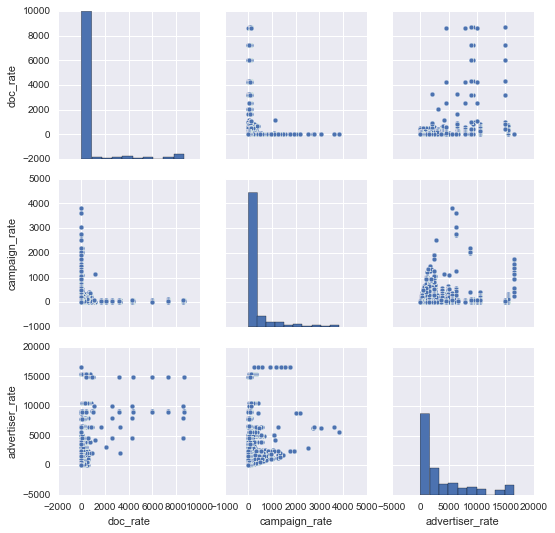

In [45]:
sb.pairplot(ads.drop(['ad_id', 'document_id'], axis=1))